In [1]:
import neurphys.read_pv as rpv
import neurphys.pacemaking as pace
import numpy as np
import pandas as pd
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#opens the folder containing the voltage recording files and creates a dataframe
file= '/Users/ezt309/Documents/2p/electrophys/test recording/test_recording_IC0'
df = rpv.import_folder(file)['voltage recording']

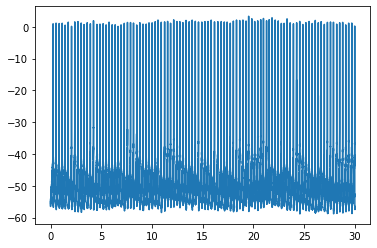

In [9]:
#plot recording (time vs primary or time vs secondary, can be specified)
plt.plot(df.time, df.primary)

In [12]:
#calculate Inter Spike Intervals ISI and frequency of peaks based on parameters in parenthesis: minimum peak height and minimum peak distance
intervals = pace.calc_freq(df, mph= -20, mpd= 200, hz= False)
freqs = pace.calc_freq(df, mph= -20, mpd= 200, hz= True)
both = pd.DataFrame({'isi': intervals, 'freq': freqs})
#np.savetxt('intervals.csv', intervals)
#np.std(intervals)
#np.savetext('both.csv', both)

#save csv file as output as name of the folder + following text
both.to_csv(file+'_ISI_Freq_fullrecording.csv', index= False)

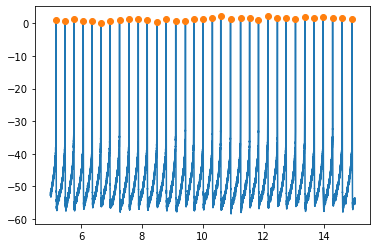

In [13]:
#Detect peaks for the interval of time selected. If the time points are 0 and the end of the recording, this will be applied to the whole recording.
mask = (df.time > 5 ) & (df.time < 15)
subset = df[mask]
plt.plot(subset.time, subset.primary)

#Detect peaks based on following parameters:
peaks = pace.detect_peaks(subset.primary, mph= -20, mpd=200)

#Plot recording indicating the peaks that have been detected with a symbol
plt.plot(subset.time.iloc[peaks], subset.primary.iloc[peaks], 'o')
#plt.xlim(0.5, 0.8)


In [14]:
##calculate Inter Spike Intervals ISI and frequency of peaks as above, but only for the interval selected above
intervals = pace.calc_freq(subset, mph= -20, mpd = 200, hz=False)
freqs = pace.calc_freq(subset, mph = -20, mpd = 200, hz=True)
both= pd.DataFrame ({'isi': intervals, 'freq': freqs})
#np.savetext('intervals.csv', intervals)
# np.std(intervals)
#np.savetxt('both.csv', both)
#save csv file as output as name of the folder + following text
both.to_csv(file+'_ISI_Freq_mask.csv', index=False)